# FIFA 18 

FIFA 18 Complete Player Dataset es un Dataset de Kaggle que contiene toda la estadística de jugadores extraída del videojuego FIFA 18. 

El presente trabajo busca crear un modelo que prediga el puntaje total "Overall" de cada jugador a partir de sus puntajes individuales en sus demás atribytos.

Empezamos por importar las librerías básicas y leer el dataset:

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
df = pd.read_csv('CompleteDataset.csv')
df.head()

C:\Users\Tycho Brahe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primero hay que filtrar las columnas con información relevante.

In [173]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

-Unnamed es el índice de los datos lo cual es información redundante.

-Foto, Bandera, Logo del Club, Valor, Salario y puntajes en posiciones específicas es información innecesaria para el presente estudio.

-Vamos a "deshacernos" de esas columnas. 

In [174]:
cols = ['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
        'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

df = df[cols]

Por "buena" práctica vamos a cambiar las columnas a sólo minúsculas.

In [175]:
df.columns = df.columns.str.lower()

# ¿Cuál es la edad promedio de un futbolista profesional?

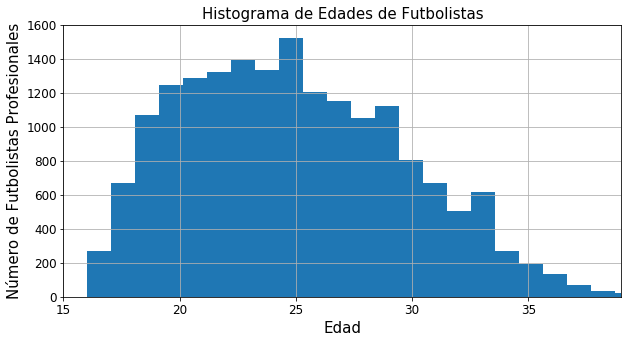

La edad promedio de un futbolista profesional es: 25
Con una desviación estandar de: 5


In [176]:
plt.figure(figsize=(10,5))
df.age.hist(bins=30)
plt.xlabel('Edad', fontsize = 15)
plt.ylabel('Número de Futbolistas Profesionales',fontsize = 15)
plt.title('Histograma de Edades de Futbolistas', fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(15, df.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional es: %1.0f' % df.age.mean())
print('Con una desviación estandar de: %1.f' % df.age.std())

Algunas medidas de tendencia central de la edad de los futbolistas profesionales son:

In [177]:
round(df.age.describe(),0)

count    17981.0
mean        25.0
std          5.0
min         16.0
25%         21.0
50%         25.0
75%         28.0
max         47.0
Name: age, dtype: float64

## Distribución de Edades de los Porteros

Se tiene la creencia general de que los porteros se retiran a mayor edad que los jugadores de campo. De ser esto cierto, la distribución de edades mostradas anteriormente debería ser diferente si sólo consideramos el dataset de los porteros.

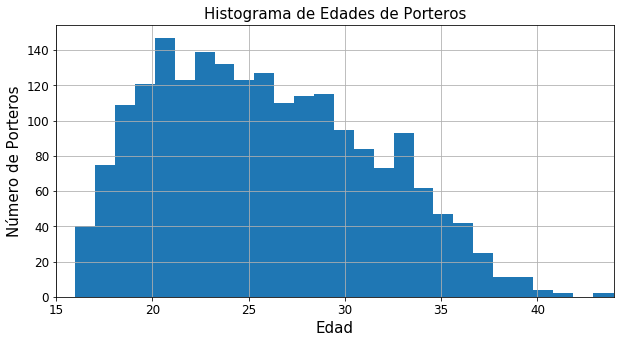

La edad promedio de un futbolista profesional que juega de portero es: 26
Con una desviación estandar de: 5


In [178]:
df_GK = df[df['preferred positions'] == 'GK ']

plt.figure(figsize=(10,5))
df_GK.age.hist(bins=30)
plt.xlabel('Edad', fontsize = 15)
plt.ylabel('Número de Porteros',fontsize = 15)
plt.title('Histograma de Edades de Porteros', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(15, df_GK.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional que juega de portero es: %1.0f' % df_GK.age.mean())
print('Con una desviación estandar de: %1.f' % df_GK.age.std())

Las medidas de tendencia central para las edades de porteros son:

In [179]:
round(df_GK.age.describe(),0)

count    2029.0
mean       26.0
std         5.0
min        16.0
25%        22.0
50%        26.0
75%        30.0
max        47.0
Name: age, dtype: float64

### Distribución de los Jugadores que No Son Porteros

Ya que hemos aislado a la población de porteros, veamos si la población aislada de jugadores de campo tiene un comportamiento diferente.

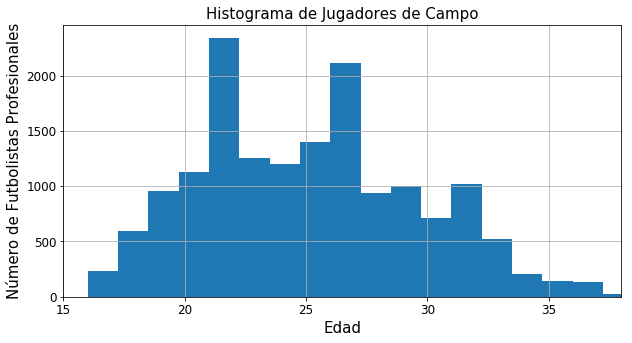

La edad promedio de un futbolista profesional de campo es: 25
Con una desviación estandar de: 4


In [180]:
df_FP = df[df['preferred positions'] != 'GK ']

plt.figure(figsize=(10,5))
df_FP.age.hist(bins=20)
plt.xlabel('Edad', fontsize = 15)
plt.ylabel('Número de Futbolistas Profesionales',fontsize = 15)
plt.title('Histograma de Jugadores de Campo', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(15, df_FP.age.quantile(0.999))
plt.show()
print('La edad promedio de un futbolista profesional de campo es: %1.0f' % df_FP.age.mean())
print('Con una desviación estandar de: %1.f' % df_FP.age.std())

In [181]:
round(df_FP.age.describe(),0)

count    15952.0
mean        25.0
std          4.0
min         16.0
25%         21.0
50%         25.0
75%         28.0
max         41.0
Name: age, dtype: float64

Observamos que el promedio y la desviación estándar para la muestra de porteros y jugadores son prácticamente iguales, también las demás medidas de tendencia central difieren a lo mucho por uno o dos años por lo que la creencia popular de que los porteros tienden a jugar por mucho más tiempo, salvo algunos casos excepcionales que no alteran el comportamiento general de la población, es falsa. 

# ¿Cuál es el país que más futbolistas profesionales genera?

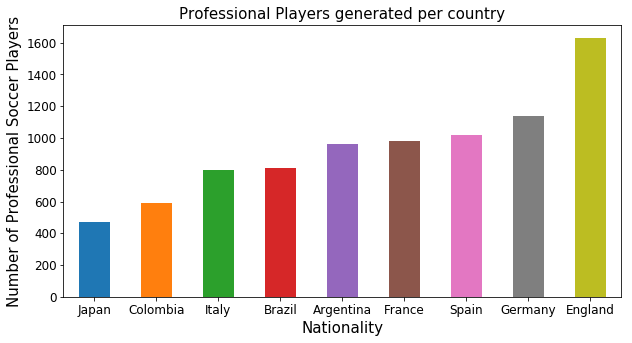

In [182]:
plt.figure(figsize=(10,5))
df.groupby('nationality').count().name.sort_values().tail(9).plot.bar(rot=0)
plt.xlabel('Nationality', fontsize = 15)
plt.ylabel('Number of Professional Soccer Players', fontsize = 15)
plt.title('Professional Players generated per country', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Inglaterra es el país que más salen futbolistas profesionales genera, seguido de Alemania, España, Francia y Argenitina.

### ¿Qué país tiene más futbolistas profesionales de alto nivel?

Como el DataFrame está ordenado de mayor a menor overall bastará con tomar los primeros 40 datos y analizarlos.

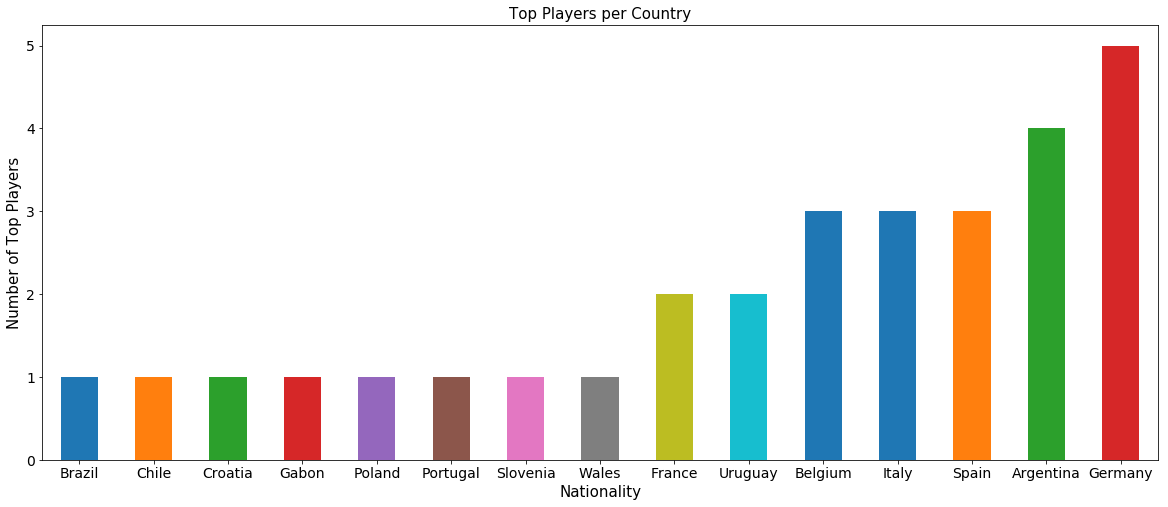

In [183]:
plt.figure(figsize=(20,8))
df.head(30).groupby('nationality').count().name.sort_values().plot.bar(rot=0)
plt.xlabel('Nationality', fontsize = 15)
plt.ylabel('Number of Top Players',fontsize= 15)
plt.title('Top Players per Country', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

Así, a pesar de que Inglaterra produce un sinfín de futbolistas profesionales, ninguno de ellos logran estar en el top 25 de mejores jugadores del mundo, resultando en un equipo nacional mediano incapaz de ganar torneos internacionales.

# ¿Qué clubes tienen los mejores jugadores del mundo?

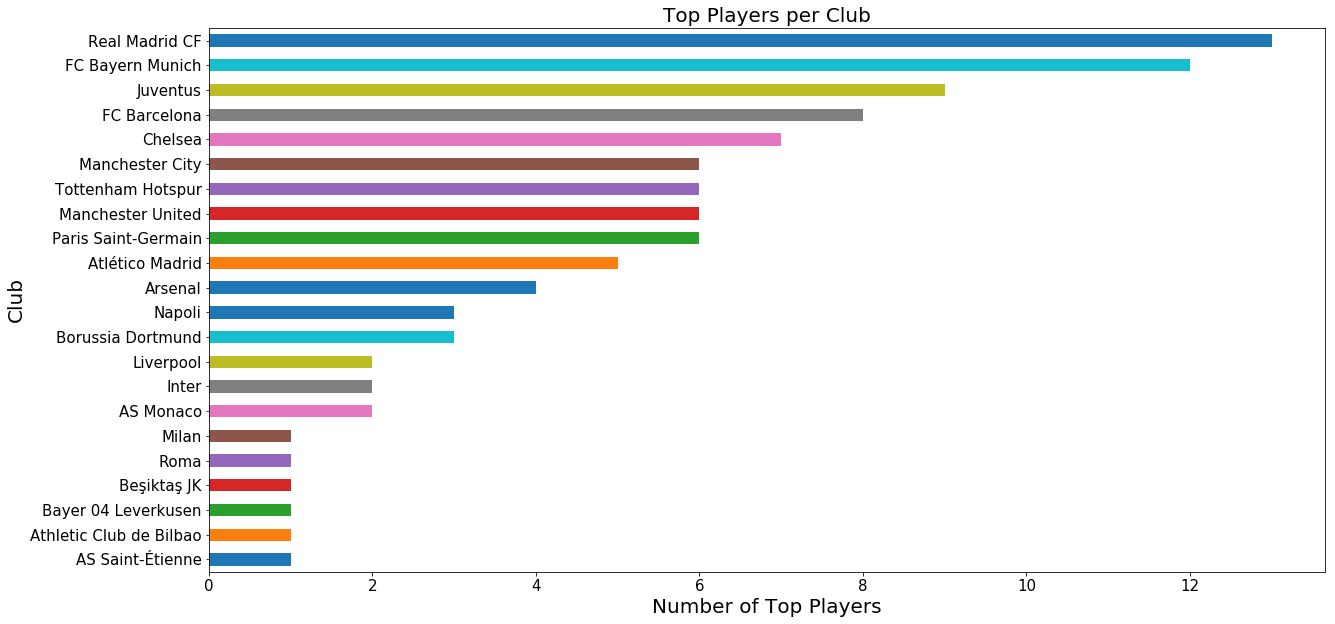

In [184]:
plt.figure(figsize=(20,10))
df.head(100).groupby('club').count().name.sort_values().plot.barh()
plt.xlabel('Number of Top Players', fontsize = 20)
plt.ylabel('Club', fontsize = 20)
plt.title('Top Players per Club', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Los clubes con más jugadores top 100 en el mundo son el Real Mandril, el Bayern Munich, la Juventus y el Farsa, equipos que en los últimos años han protagonizado casi todas las finales de la UEFA Champions League.  

# Relación entre variables numéricas

Primero sólo tomemos en cuenta las columnas con datos numéricos, es decir, quitamos la columna de nombre.

In [185]:
cols_num = ['age', 'overall', 'potential', 'special', 'acceleration',
         'aggression', 'agility', 'balance', 'ball control', 'composure',
         'crossing', 'curve', 'dribbling','finishing', 'free kick accuracy',
         'gk diving', 'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes', 
         'heading accuracy','interceptions', 'jumping', 'long passing', 'long shots',
         'marking','penalties', 'positioning', 'reactions', 'short passing', 'shot power',
         'sliding tackle', 'sprint speed', 'stamina', 'standing tackle', 'strength', 
         'vision', 'volleys']

In [186]:
df_num =df[cols_num]
df_num.head()

,age,overall,potential,special,acceleration,aggression,agility,balance,ball control,composure,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
0,32,94,94,2228,89,63,89,63,93,95,...,96,83,94,23,91,92,31,80,85,88
1,30,93,93,2154,92,48,90,95,95,96,...,95,88,85,26,87,73,28,59,90,85
2,25,92,94,2100,94,56,96,82,95,92,...,88,81,80,33,90,78,24,53,80,83
3,30,92,92,2291,88,78,86,60,91,83,...,93,83,87,38,77,89,45,80,84,88
4,31,92,92,1493,58,29,52,35,48,70,...,85,55,25,11,61,44,10,83,70,11


In [187]:
df_num.columns

Index(['age', 'overall', 'potential', 'special', 'acceleration', 'aggression',
       'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve',
       'dribbling', 'finishing', 'free kick accuracy', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes',
       'heading accuracy', 'interceptions', 'jumping', 'long passing',
       'long shots', 'marking', 'penalties', 'positioning', 'reactions',
       'short passing', 'shot power', 'sliding tackle', 'sprint speed',
       'stamina', 'standing tackle', 'strength', 'vision', 'volleys'],
      dtype='object')

In [188]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 38 columns):
age                   17981 non-null int64
overall               17981 non-null int64
potential             17981 non-null int64
special               17981 non-null int64
acceleration          17981 non-null object
aggression            17981 non-null object
agility               17981 non-null object
balance               17981 non-null object
ball control          17981 non-null object
composure             17981 non-null object
crossing              17981 non-null object
curve                 17981 non-null object
dribbling             17981 non-null object
finishing             17981 non-null object
free kick accuracy    17981 non-null object
gk diving             17981 non-null object
gk handling           17981 non-null object
gk kicking            17981 non-null object
gk positioning        17981 non-null object
gk reflexes           17981 non-null object
heading accurac

Notamos que casi todas las variables numéricas son object en lugar de float o integer. Hay que transformar las variables para hacer el análisis numérico. 

In [189]:
df_num = df_num.astype('float')

ValueError: could not convert string to float: '15+8'

El dataframe tiene datos del estilo 15+8, hay que modificar el dataset:

In [190]:
for i in cols_num:
    print(df_num[i].unique())

[32 30 25 31 28 26 27 29 39 23 24 35 33 34 36 21 22 18 20 19 37 38 40 17
 44 41 16 43 47]
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47
 46]
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 46]
[2228 2154 2100 ... 1226  736  874]
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '70+9' '56' '26' '80+1' '35' '36' '32' '49-1' '41'
 '67+2' '37' '28' '33' '20' '79-2' '65-2' '29' '91-2' '74-3' '75+1' '41-6'
 '74+1' '70+3' '17' '75+5' '74+2' '71+2' '68+1' '71+4' '89-2' '25' '27'
 '24' '58-10' '78+1' '86+1' '66-1' '22' '66+1' '15' '74+4' '71-3' '80+2'


Lo que haremos es tomar los datos de la forma número + número y sólo tomaremos los primeros dos caracteres:

In [191]:
for i in cols_num:
    df[i] = df[i].astype(str).str[:2]
    print(df[i].unique())

['32' '30' '25' '31' '28' '26' '27' '29' '39' '23' '24' '35' '33' '34'
 '36' '21' '22' '18' '20' '19' '37' '38' '40' '17' '44' '41' '16' '43'
 '47']
['94' '93' '92' '91' '90' '89' '88' '87' '86' '85' '84' '83' '82' '81'
 '80' '79' '78' '77' '76' '75' '74' '73' '72' '71' '70' '69' '68' '67'
 '66' '65' '64' '63' '62' '61' '60' '59' '58' '57' '56' '55' '54' '53'
 '52' '51' '50' '49' '48' '47' '46']
['94' '93' '92' '91' '90' '89' '88' '87' '86' '85' '84' '83' '82' '81'
 '80' '79' '78' '77' '76' '75' '74' '73' '72' '71' '70' '69' '68' '67'
 '66' '65' '64' '63' '62' '61' '60' '59' '58' '57' '56' '55' '54' '53'
 '52' '51' '50' '49' '48' '46']
['22' '21' '14' '20' '19' '12' '18' '13' '16' '17' '11' '15' '10' '98'
 '92' '97' '91' '96' '99' '95' '94' '89' '90' '93' '88' '86' '87' '85'
 '84' '82' '83' '80' '78' '81' '76' '79' '77' '75' '72' '73']
['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55'

Podemos ver que el ciclo for aplicado ha corregido el problema. Procedemos a cambiar el dato de tipo object a tipo float:

In [192]:
df[cols_num] = df[cols_num].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 42 columns):
name                   17981 non-null object
age                    17981 non-null float64
nationality            17981 non-null object
overall                17981 non-null float64
potential              17981 non-null float64
club                   17733 non-null object
special                17981 non-null float64
acceleration           17981 non-null float64
aggression             17981 non-null float64
agility                17981 non-null float64
balance                17981 non-null float64
ball control           17981 non-null float64
composure              17981 non-null float64
crossing               17981 non-null float64
curve                  17981 non-null float64
dribbling              17981 non-null float64
finishing              17981 non-null float64
free kick accuracy     17981 non-null float64
gk diving              17981 non-null float64
gk handling         

Ya que todos los datos numéricos son del tipo float64 podemos empezar el análisis.

In [193]:
df_num = df[cols_num]
df_num.head()

,age,overall,potential,special,acceleration,aggression,agility,balance,ball control,composure,...,reactions,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys
0,32.0,94.0,94.0,22.0,89.0,63.0,89.0,63.0,93.0,95.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,30.0,93.0,93.0,21.0,92.0,48.0,90.0,95.0,95.0,96.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,25.0,92.0,94.0,21.0,94.0,56.0,96.0,82.0,95.0,92.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,30.0,92.0,92.0,22.0,88.0,78.0,86.0,60.0,91.0,83.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,31.0,92.0,92.0,14.0,58.0,29.0,52.0,35.0,48.0,70.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


Veamos los coeficientes de correlación entre las variables numéricas del dataset.

Generamos un mapa de calor de todas las variables numéricas con la librería seaborn.

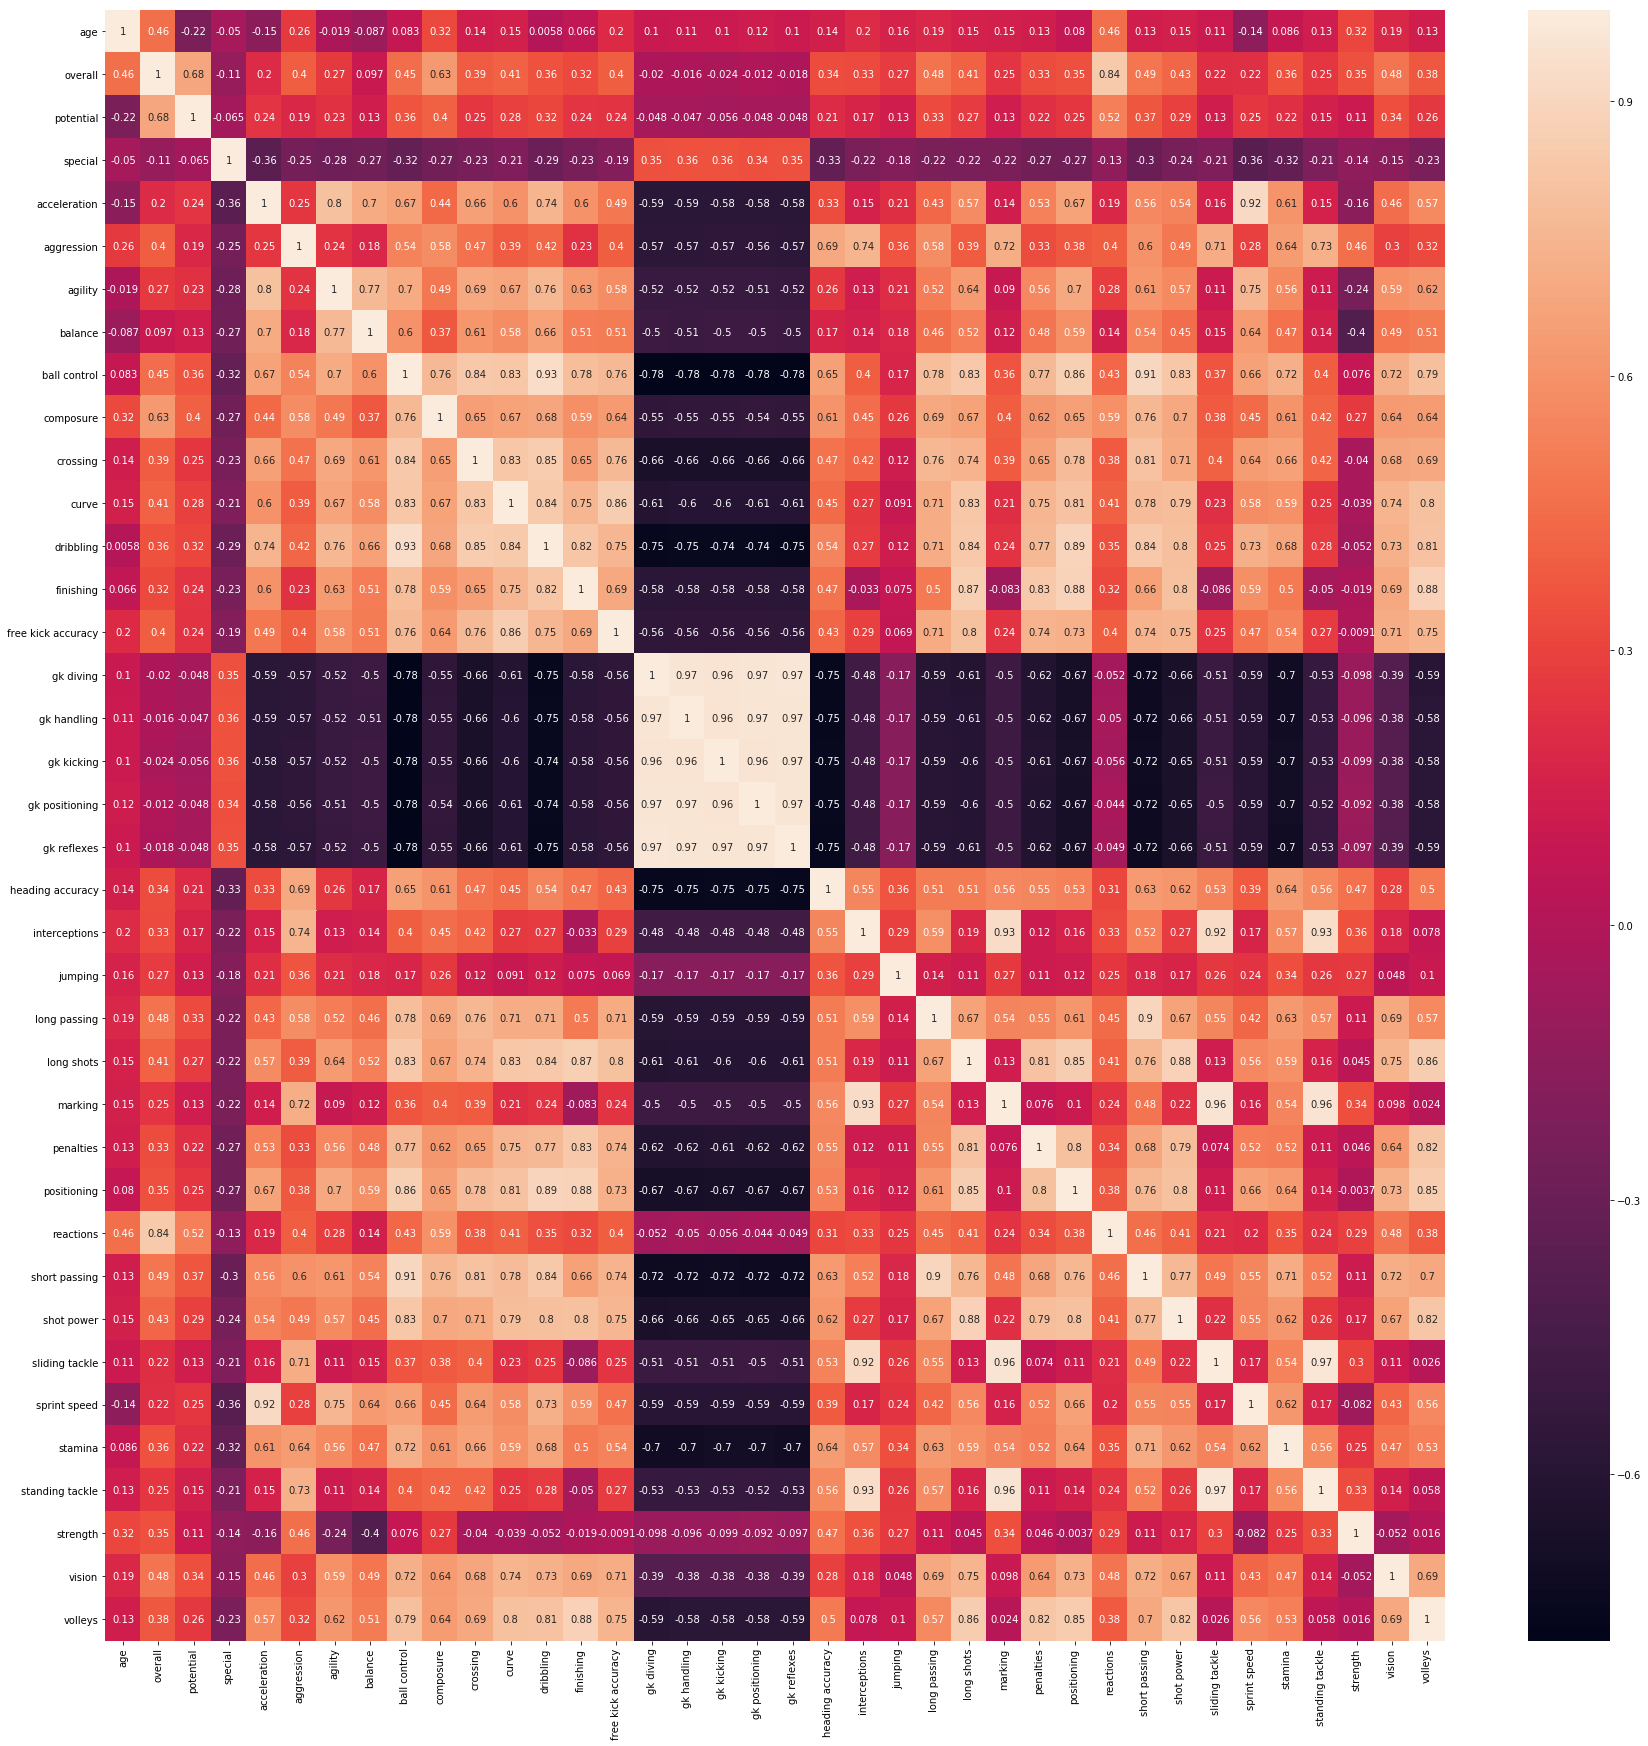

In [194]:
import seaborn as sbn

plt.figure(figsize=(30,30))
sbn.heatmap(df_num.corr(), annot = True)

Aquí observamos que muchas variables presentan una fuerte correlación entre ellas.

Dado que nuestra variable objetivo es overall, veamos específicamente los coeficientes de correlación con las demás variables numéricas.

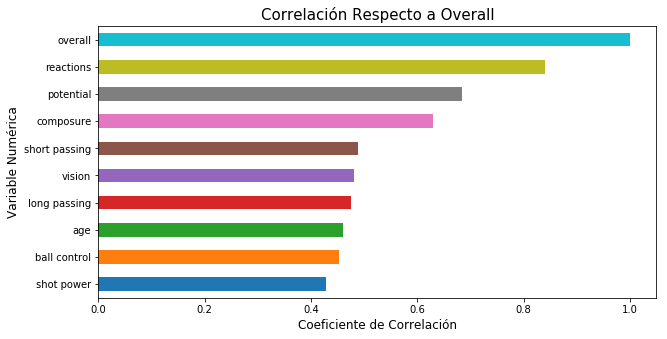

In [195]:
plt.figure(figsize=(10,5))
df.corrwith(df.overall).sort_values(ascending = True).tail(10).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

La variable numérica más correlacionada positivamente con overall es reacciones, grafiquemos esta variable contra overall para comprobarlo. 

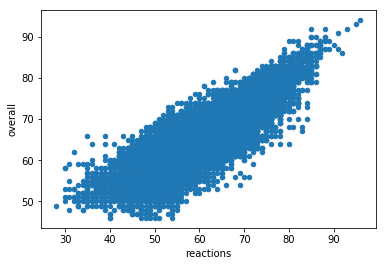

In [196]:
df[['overall','reactions']].plot.scatter(x='reactions',y='overall')

Se observa más o menos una relación lineal por lo que el coeficiente de correlación no nos engaña.

Ahora revisemos las correlaciones negativas:

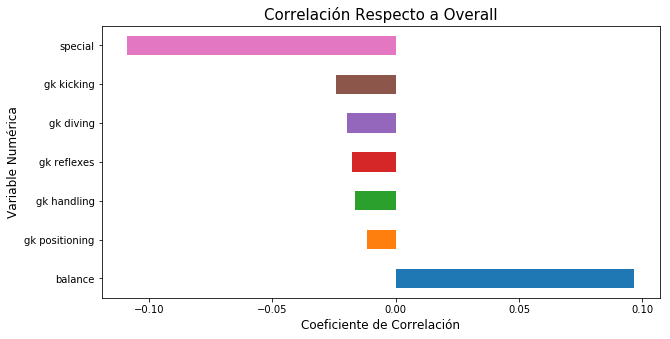

In [197]:
plt.figure(figsize=(10,5))
df.corrwith(df.overall).sort_values(ascending = False).tail(7).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

Aquí observamos que las variables correlacionadas negativamente con overall son special y aquellas que tienen que ver con habilidades de portero lo cual es extraño pues estas deberían ser importantes para los porteros. Además estas correlaciones son todas muy pequeñas al grado que podría decirse que, antes que estar relacionadas negativamente con la variable objetivo, más bien son despreciables respecto a ella.

Revisemos qué duplas de variables presentan una correlación mayor al 0.8:

In [198]:
for i in df_num.columns:
    for j in df_num.columns:
        if df_num.corr().loc[i,j] > 0.8:
            if i != j:
                if i != 'overall':
                    if j != 'overall':
                        print(i,j)
            

acceleration sprint speed
ball control crossing
ball control curve
ball control dribbling
ball control long shots
ball control positioning
ball control short passing
ball control shot power
crossing ball control
crossing curve
crossing dribbling
crossing short passing
curve ball control
curve crossing
curve dribbling
curve free kick accuracy
curve long shots
curve positioning
curve volleys
dribbling ball control
dribbling crossing
dribbling curve
dribbling finishing
dribbling long shots
dribbling positioning
dribbling short passing
dribbling volleys
finishing dribbling
finishing long shots
finishing penalties
finishing positioning
finishing volleys
free kick accuracy curve
free kick accuracy long shots
gk diving gk handling
gk diving gk kicking
gk diving gk positioning
gk diving gk reflexes
gk handling gk diving
gk handling gk kicking
gk handling gk positioning
gk handling gk reflexes
gk kicking gk diving
gk kicking gk handling
gk kicking gk positioning
gk kicking gk reflexes
gk positi

Aunque tenemos duplas repetidas en la última sección, notemos que estas correlaciones tienen bastante lógica. Todas las habilidades de portero tienen alta correlación pues es natural que si el portero tiene buenos reflejos, también tenga buena salida e intuición de dónde debe colocarse. Si un jugador tiene un gran control de balón también es natural que sepa dribblear de manera excepcional. Un buen cobrador de penales debería tener también un buen tiro de larga distancia. 

Dejemos el dataset como está y sigamos adelante. 

# Observaciones 

-No tengo ni idea de qué sea eso de special.

-Todas las habilidades de portero, excepto reacción, están correlacionadas negativamente con las demás habilidades. Esto podría deberse a que, en general, los porteros tienden a no tener habilidades de juego como sus compañeros de equipo (por eso son porteros).

-La variable más correlacionada con overall es reacciones, esto puede deberse a que este atributo suma puntos tanto a porteros como a jugadores de campo.




# Regresión Lineal

Ahora haremos una regresión lineal con las skills de cada jugador eligiendo como variable objetivo el overall.

Primero tomaremos en cuenta todos los datos que se escogerán de manera aleatoria, después consideraremos sólo los datos de los porteros y, por último, sólo con los jugadores de campo.

In [199]:
from sklearn.model_selection import train_test_split

# Tomando todos los datos

Definimos X como las variables que se utilizarán para predecir la variable objetivo y y separamos en conjuntos de entrenamiento y prueba.

In [200]:
X = df_num.drop('overall',1)
y = df_num.overall

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Aplicando el modelo de regresión lineal múltiple con la librería sklearn:

In [201]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Importamos métricas de sklearn para evaluar el rendimiento del modelo y también calculamos la distribución de residuos del modelo.

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

Definamos la función ev para evaluar el performance del método en términos de su mean squared error, valor de residuo promedio y el R2 correspondiente a la gráfica de dispersión entre predicciones y valores reales:

In [203]:
def ev(y_pred,y_test):
    print('Mean Squared Error: %1.2f' % np.sqrt(mean_squared_error(y_pred,y_test)))
    plt.figure(figsize = (10,6))
    res = (y_pred-y_test)/y_test * 100
    res.hist(bins = 100)
    plt.xlabel('Residuo', fontsize = 15)
    plt.ylabel('Cuenta de Residuos', fontsize = 15)
    plt.title('Análisis de Residuos', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlim(res.quantile(0.005), res.quantile(0.99))
    plt.show()
    print('Residuos en promedio son: %1.1f' % res.mean()+ ' por ciento')
    
    plt.figure(figsize = (10,6))
    plt.scatter(y_pred,y_test)
    plt.xlabel('Prediction', fontsize = 15)
    plt.ylabel('Real Value', fontsize = 15)
    plt.title('Predictions Scaterring', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    print('R^2: %1.2f' %r2_score(y_test,y_pred))

Evaluando el rendimiento de nuestro algoritmo con la función definida:

Mean Squared Error: 1.94


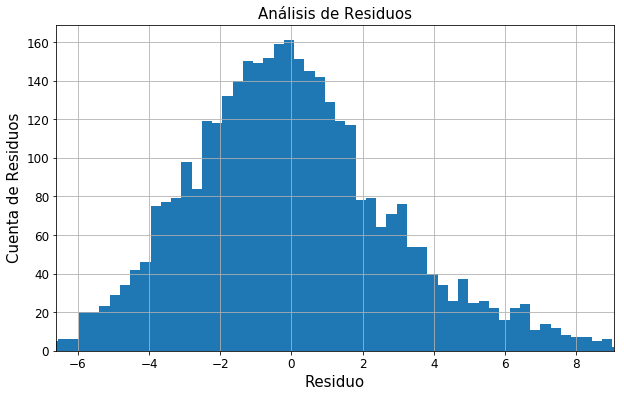

Residuos en promedio son: 0.1 por ciento


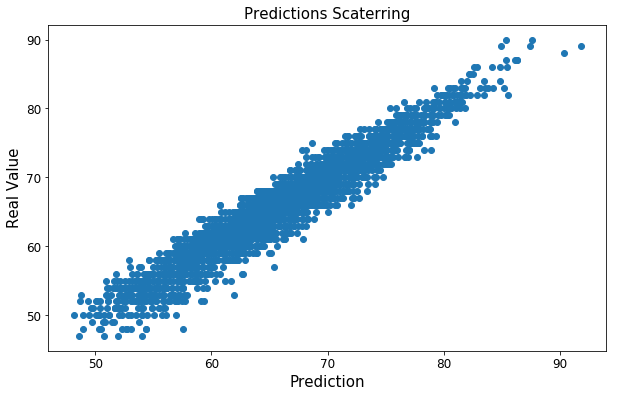

R^2: 0.92


In [204]:
ev(y_pred,y_test)

Las métricas utilizadas para evaluar el modelo nos dan resultados muy alentadores, a saber: residuo promedio del 0.1 por ciento, R_2 muy cercana a 1 y raíz de mean squared error de 1.94. 

Cabe preguntarnos: ¿un mean squared error de 1.94 es mucho o es poco? Para aclararlo revisemos el dataset:

In [205]:
df.head(5)

,name,age,nationality,overall,potential,club,special,acceleration,aggression,agility,...,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,vision,volleys,preferred positions
0,Cristiano Ronaldo,32.0,Portugal,94.0,94.0,Real Madrid CF,22.0,89.0,63.0,89.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30.0,Argentina,93.0,93.0,FC Barcelona,21.0,92.0,48.0,90.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25.0,Brazil,92.0,94.0,Paris Saint-Germain,21.0,94.0,56.0,96.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30.0,Uruguay,92.0,92.0,FC Barcelona,22.0,88.0,78.0,86.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31.0,Germany,92.0,92.0,FC Bayern Munich,14.0,58.0,29.0,52.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK


Fijémosnos en el overall de Cristiano Ronaldo. Un error de 2 puntos nos llevaría de un jugador con las habilidades de Cristiano Ronaldo (94) al puntaje presentado por Neymar (92), ambos jugadores son top 5 y ambos tienen habilidades extraordinarias para jugar fútbol por lo que un error de dos puntos en el overall nos lleva a predicciones que siguen siendo congruentes.

Ahora veamos los valores de los coeficientes correspondientes a cada variable calculados por el algoritmo:

<Figure size 360x360 with 0 Axes>

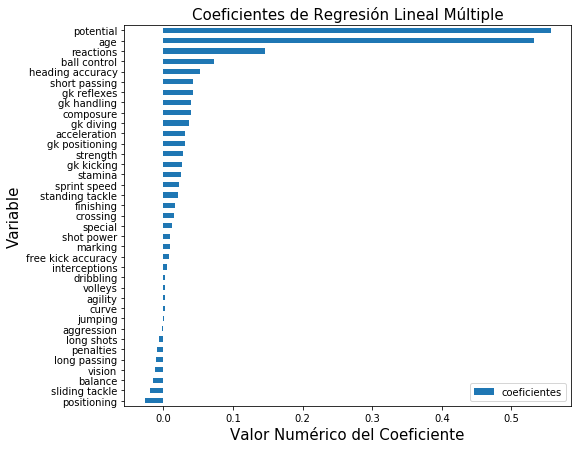

In [206]:
coef = regressor.coef_
coefs = pd.DataFrame(index = X_train.columns, data = coef, columns = ['coeficientes'])
coefs = coefs.sort_values(by= 'coeficientes')

plt.figure(figsize = (5,5))
coefs.plot.barh(figsize=(8,7))
plt.title('Coeficientes de Regresión Lineal Múltiple', fontsize = 15)
plt.xlabel('Valor Numérico del Coeficiente', fontsize = 15)
plt.ylabel('Variable', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

Las skills que suman más puntos al overall son potencial, edad, reacciones y control de balón lo cual es consistente con los coeficientes de correlación lineal.

Ahora algunos ejemplos aislados

In [207]:
Cristy = df[df['name'] == 'Cristiano Ronaldo']
print('Predicted Overall of CR7 is: %2.0f' %regressor.predict(Cristy[X.columns]))
print('Real Overall value of CR7 is: %2.0f' %Cristy.overall)

Predicted Overall of CR7 is: 96
Real Overall value of CR7 is: 94


In [208]:
Hirving = df[df['name'] == 'H. Lozano']
print('Predicted Overall of Chuckie is: %2.0f' %regressor.predict(Hirving[X.columns]))
print('Real Overall value of Chuckie is: %2.0f' %Hirving.overall)

Predicted Overall of Chuckie is: 77
Real Overall value of Chuckie is: 78


In [209]:
Courtois = df[df['name'] == 'T. Courtois']
print('Predicted Overall of Courtois is: %2.0f' %regressor.predict(Courtois[X.columns]))
print('Real Overall value of Courtois: %2.0f' %Courtois.overall)

Predicted Overall of Courtois is: 85
Real Overall value of Courtois: 89


In [210]:
Ochoa = df[df['name'] == 'G. Ochoa']
print('Predicted Overall of 8a is: %2.0f' %regressor.predict(Ochoa[X.columns]))
print('Real Overall value of 8a: %2.0f' %Ochoa.overall)

Predicted Overall of 8a is: 78
Real Overall value of 8a: 79


# Aislando a los porteros

El modelo anterior peca de no darle peso suficiente a los coeficientes correspondientes a las habilidades de portero diferentes a reacción, lo cual nos sugiere que el dataset de porteros deben ser tratado de forma aislada.

Aislando a los porteros y repitiendo el análisis anterior:

In [211]:
df_GK = df[df['preferred positions'] == 'GK '] 
df_GK.shape

(2029, 42)

Notemos que el dataset es muchísimo más pequeño que antes.

Ya que tenemos un dataset diferente conviene hacer el análisis de los coeficientes de correlación de nuevo:

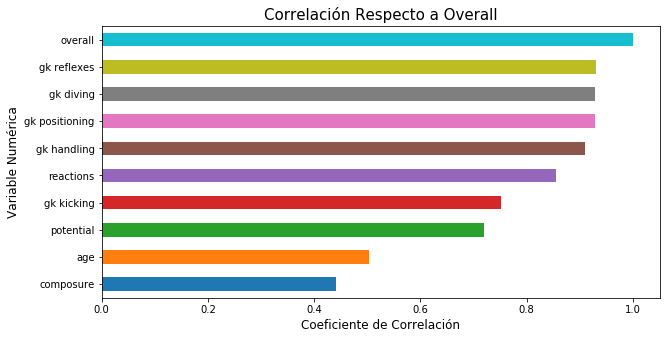

In [212]:
plt.figure(figsize=(10,5))
df_GK.corrwith(df_GK.overall).sort_values().tail(10).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

Observemos que las variables más correlacionadas positivamente con overall han cambiado. Ahora que el dataset incluye sólo a porteros las correlaciones más fuertes se encuentran en las variables que describen habilidades de porteros.

Ahora veamos cuáles son las variables más correlacionadas negativamente con overall:

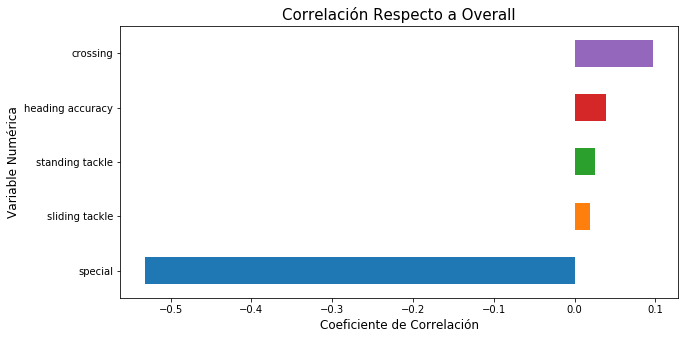

In [213]:
plt.figure(figsize=(10,5))
df_GK.corrwith(df_GK.overall).sort_values().head(5).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

En este caso, la única variable correlacionada negativamente con overall es special y las variables menos correlacionadas positivamente son atributos que son importantes para jugadores de campo.

Una vez hecho el estudio de correlación, dividimos el dataset en conjunto de entrenamiento y prueba:

In [214]:
X_GK = df_GK[X.columns]
y_GK = df_GK.overall

X_trainGK, X_testGK, y_trainGK, y_testGK = train_test_split(X_GK, y_GK, test_size = 0.20, random_state= 0)

regressorGK = LinearRegression()
regressorGK.fit(X_trainGK, y_trainGK)
y_predGK = regressorGK.predict(X_testGK)

Haciendo el análisis de residuo y evaluando el rendimiento del algoritmo:

Mean Squared Error: 0.33


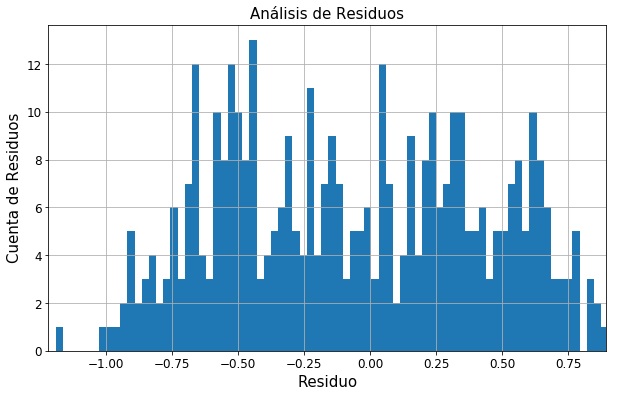

Residuos en promedio son: -0.1 por ciento


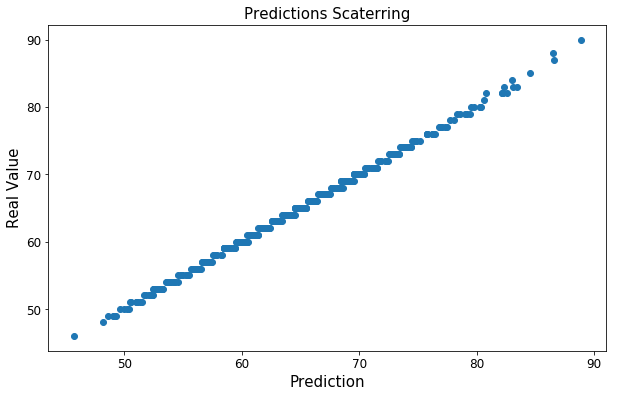

R^2: 1.00


In [215]:
ev(y_predGK, y_testGK)

Notemos que todos los parámetros "mejoraron" al analizar a los porteros por separado. El error cuadrático medio bajó de 2 a 0.3 y la R2 subió de 0.92 a 1. Acorde a estas métricas, nuestro modelo prácticamente no se equivoca.

Revisemos los coeficientes de la regresión lineal múltiple en este dataset de porteros:

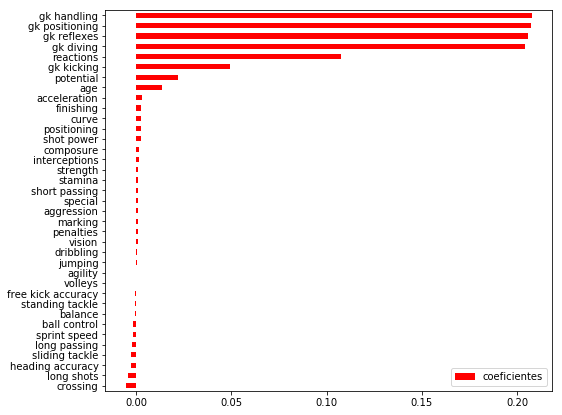

In [216]:
coef = regressorGK.coef_
coefs = pd.DataFrame(index = X_train.columns, data= coef, columns = ['coeficientes'])
coefs = coefs.sort_values(by = 'coeficientes', ascending = True)
coefs.plot.barh(color = 'red', figsize = (8,7))

Observamos que en este caso el modelo le ha dado más peso a los atributos propiamente de porteros antes que a las habilidades esenciales de juego lo cual hace sentido dado que sólo estamos evaluando porteros.

Algunos ejemplos aislados:

In [217]:
Courtois = df[df['name'] == 'T. Courtois']
print('Predicted Overall of Courtois is: %2.0f' %regressorGK.predict(Courtois[X.columns]))
print('Real Overall value of Courtois: %2.0f' %Courtois.overall)

Predicted Overall of Courtois is: 87
Real Overall value of Courtois: 89


In [218]:
Ochoa = df[df['name'] == 'G. Ochoa']
print('Predicted Overall of 8a is: %2.0f' %regressorGK.predict(Ochoa[X.columns]))
print('Real Overall value of 8a: %2.0f' %Ochoa.overall)

Predicted Overall of 8a is: 78
Real Overall value of 8a: 79


Ha mejorado la predicción de Cortois y la de Ochoa se ha mantenido.

# Aislando Jugadores de Campo

Repetimos el mismo proceso que antes, pero ahora excluyendo a los porteros.

In [219]:
# FP stands for Field Player
df_FP = df[df['preferred positions'] != 'GK '] 

Dado que no estamos evaluando porteros, debemos eliminar los skills de porteros del data set.

In [220]:
X_F = ['age', 'potential', 'special', 'acceleration', 'aggression',
       'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve',
       'dribbling', 'finishing', 'heading accuracy', 'interceptions', 'jumping', 'long passing',
       'long shots', 'marking', 'penalties', 'positioning', 'reactions',
       'short passing', 'shot power', 'sliding tackle', 'sprint speed',
       'stamina', 'standing tackle', 'strength', 'vision', 'volleys']

Repitiendo el estudio de correlación:


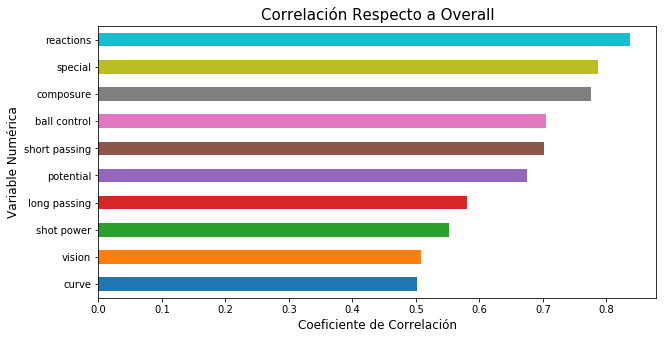

In [221]:
plt.figure(figsize=(10,5))
df_FP[X_F].corrwith(df_FP.overall).sort_values().tail(10).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

Notamos que special, que se correlacionaba negativamente en el dataset de los porteros, en este data set es una de las variables correlación positva más alta. 

Y en cuanto a las negativas:

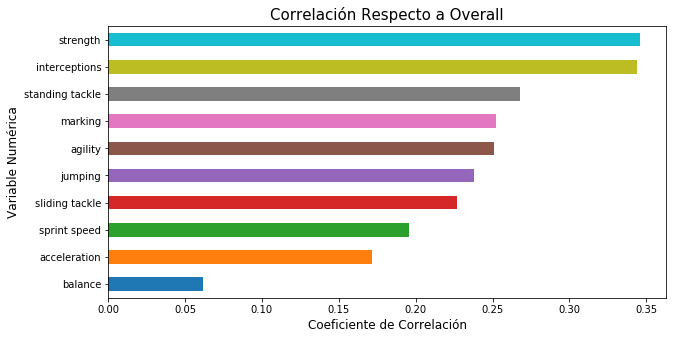

In [222]:
plt.figure(figsize=(10,5))
df_FP[X_F].corrwith(df_FP.overall).sort_values().head(10).plot.barh()
plt.title('Correlación Respecto a Overall', fontsize = 15)
plt.ylabel('Variable Numérica', fontsize = 12)
plt.xlabel('Coeficiente de Correlación', fontsize = 12);

Ninguna de las variables escogidas se relaciona de forma negativa con overall.

Haciendo el split entre entrenamiento y prueba y aplicando la regresión multilineal:

In [223]:
X_FP = df_FP[X_F]
y_FP = df_FP.overall

X_trainFP, X_testFP, y_trainFP, y_testFP = train_test_split(X_FP, y_FP, test_size = 0.20, random_state= 0)

regressorFP = LinearRegression()
regressorFP.fit(X_trainFP, y_trainFP)
y_predFP = regressorFP.predict(X_testFP)

Haciendo análisis de residuo y evaluando el rendimiento del modelo:

Mean Squared Error: 1.87


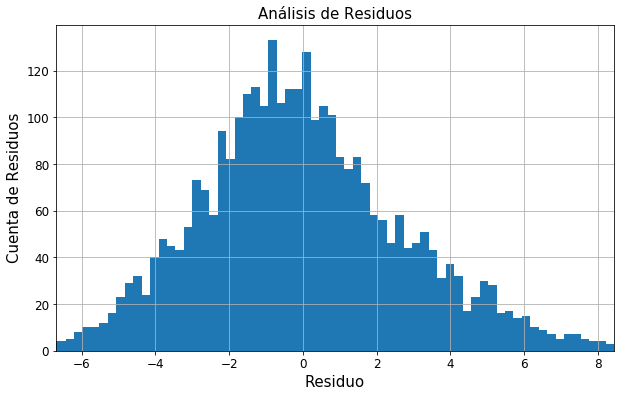

Residuos en promedio son: 0.0 por ciento


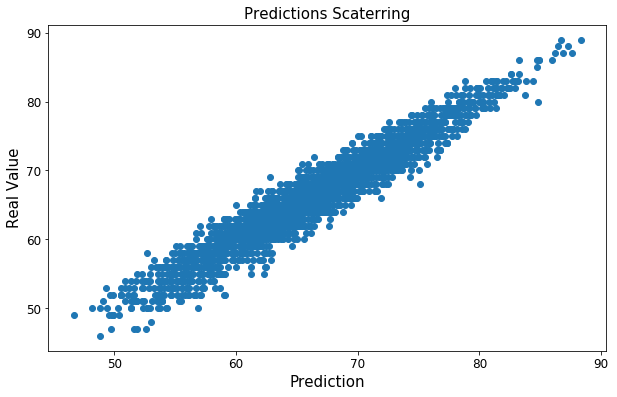

R^2: 0.93


In [224]:
ev(y_predFP, y_testFP)

Los parámetro no mejoran significativamente al aislar a los jugadores de campo respecto a cuando se tomó el dataset sin excluir datos.

Veamos el comportamiento de los coeficientes arrojados por el algoritmo:

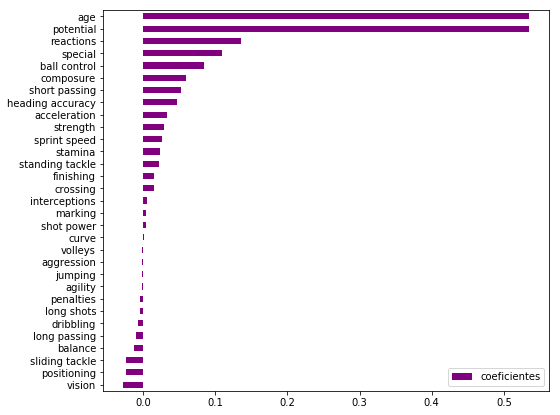

In [225]:
coefFP = regressorFP.coef_
coefsFP = pd.DataFrame(index = X_trainFP.columns, data= coefFP, columns = ['coeficientes'])
coefsFP = coefsFP.sort_values(by = 'coeficientes',ascending= True)
coefsFP.plot.barh(color = 'purple', figsize = (8,7))

En este caso el modelo ha mantenido la relevancia de los mismos coeficientes que cuando analizamos tanto a porteros como a jugadores, esto podría deberse a que hay más jugadores de campo que porteros en el data set y estos últimos no influyen mucho en los parámetros que termina escogiendo el modelo.

Algunos ejemplos aislados:

In [226]:
Cristy = df[df['name'] == 'Cristiano Ronaldo']
print('Predicted Overall of CR7 is: %2.0f' %regressorFP.predict(Cristy[X_F]))
print('Real Overall value of CR7 is: %2.0f' %Cristy.overall)

Predicted Overall of CR7 is: 96
Real Overall value of CR7 is: 94


In [227]:
Chuckie = df[df['name'] == 'H. Lozano']
print('Predicted Overall of Chuckie is: %2.0f' %regressorFP.predict(Chuckie[X_F]))
print('Real Overall value of CR7 is: %2.0f' %Chuckie.overall)

Predicted Overall of Chuckie is: 77
Real Overall value of CR7 is: 78


En términos generales, el modelo no mejora ni empeora al aislar a jugadores de campo.

# Conclusiones 

La regresión multilineal resulta adecuada para predecir el overall de los datos proporcionados por la FIFA. El rendimiento del modelo mejora para predecir el overall de porteros cuando se tratan los datos aislando a los porteros, pero no sucede lo mismo para el dataset con sólo jugadores de campo. Para mejorar el modelo es posible que deba de segmentarse aún más el dataset, a saber: evaluar defensas, mediocampistas, extremos y centro delanteros por separado, esto implicaría un poco más de trabajo dado que hay varios jugadores que en el apartado de Preferred Positions presentan dos o más posiciones. 

Aún así, a menos de que se busque aún más exactitud de la lograda con este algoritmo, considero innecesario buscar otro algoritmo o darle un tratamiento adicional a los datos. Según el criterio de las métricas empleadas para evaluarlo, el algoritmo implementado resulta adecuado y puede usarse sin temor a un error significativo para predecir los valores del overall de cualquier jugador.